# A Pseudoproxy Experiment with GraphEM and pseudoPAGES2k

**Expected time to run through: 10 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging a simple pseudoproxy dataset generated from iCESM gridded, with the realistic spatiotemporal availability of the PAGES2kv2 dataset.
The pseudoproxy are generated based on the original iCESM simulated `tas` plus white noise with `SNR=10`, using below code block:

## Test data preparation

To go through this tutorial, please prepare test data following the steps:

Download the test case named “PPE_PAGES2k” with this [link](https://drive.google.com/drive/folders/1_h6o_gDR6xLX50c_Ad-lzRoWwHlAgBnK?usp=sharing).
Create a directory named “testcases” in the same directory where this notebook sits.
Put the unzipped direcotry “PPE_PAGES2k” into “testcases”.

Below, we first load some useful packages, including our `GraphEM`.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

## Reconstruction

In [2]:
job = GraphEM.ReconJob()

In [3]:
job.load_configs('./testcases/PPE_PAGES2k/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PPE_PAGES2k/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon created
{'anom_period': [1951, 1980],
 'calib_period': [1900, 2000],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon',
 'job_id': 'GraphEM_tutorial',
 'obs_path': {'tas': './data/obs/iCESM_ann.nc'},
 'obs_regrid_ntrunc': 21,
 'obs_varname': {'lat': 'lat', 'lon': 'lon', 'tas': 'tas'},
 'proxydb_path': './data/proxy/pseudoPAGES2k_dataset_tas_wn_SNR10_full_temporal_availability.pkl',
 'ptype_list': 'all',
 'recon_period': [1000, 2000]}


In [4]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/proxy/pseudoPAGES2k_dataset_tas_wn_SNR10_full_temporal_availability.pkl
GraphEM: job.load_proxydb() >>> 692 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


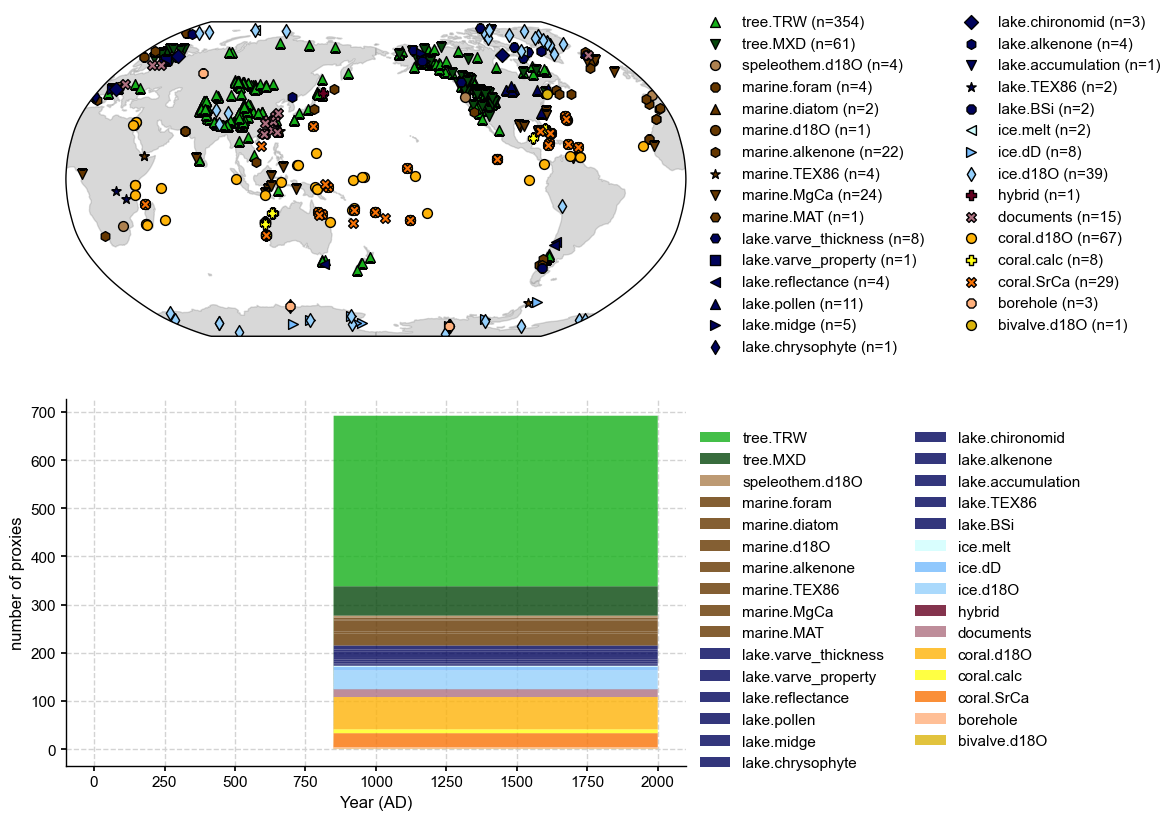

In [5]:
fig, ax = job.proxydb.plot()

In [6]:
job.load_obs(verbose=True)
print(job.obs)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc'}
GraphEM: job.load_obs() >>> job.obs created
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc
    Shape:  time:1156, lat:96, lon:144


In [7]:
# regrid obs to make the problem size smaller
job.regrid_obs(verbose=True)

LMRt: job.regrid_obs() >>> regridded obs
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/data/obs/iCESM_ann.nc
    Shape:  time:1156, lat:22, lon:33
LMRt: job.regrid_obs() >>> job.obs updated


Since the loaded iCESM simulation and the pseudoproxy dataset are already annualized, we can skip the `.seasonalize()` steps and run `.prep_data()` directly.

In [8]:
job.prep_data(verbose=True)

GraphEM: job.prep_data() >>> job.recon_time created
GraphEM: job.prep_data() >>> job.calib_time created
GraphEM: job.prep_data() >>> job.calib_idx created
GraphEM: job.prep_data() >>> job.temp created
GraphEM: job.prep_data() >>> job.df_proxy created
GraphEM: job.prep_data() >>> job.proxy created
GraphEM: job.prep_data() >>> job.lonlat created


In [9]:
job.df_proxy

,NAm_153,Asi_245,NAm_165,Asi_178,Asi_174,Eur_016,Asi_198,NAm_145,Arc_070,Arc_071,...,Asi_119,Ocn_153,NAm_074,Asi_026,Ocn_169,Asi_201,Asi_179,Arc_014,Ocn_071,Ocn_072
1000.0,2.049447,1.206348,-0.028154,0.354423,0.164291,0.700894,0.420136,1.610386,1.250028,1.241505,...,0.828330,0.074526,1.969163,0.165617,0.331053,-0.578854,0.188152,1.255906,0.304311,0.425676
1001.0,0.014990,0.708525,0.246777,-0.057988,-0.127694,-0.077910,0.477898,-1.579350,-1.453855,1.689047,...,0.986828,-0.319637,1.589055,0.146957,-0.345228,-0.449773,0.128710,1.697772,-0.457480,-0.352040
1002.0,-1.114598,-0.355595,-0.903415,-0.370463,-0.170471,0.018887,0.820904,0.335598,0.658790,-1.006825,...,-0.571258,-0.268028,-2.308910,0.313561,-0.265528,-0.357028,0.152346,-0.037280,-0.357438,-0.312209
1003.0,0.921028,0.761262,-0.241008,-0.612394,-0.198821,0.600541,0.038012,1.649567,0.484537,-0.694430,...,0.332292,0.469818,1.270690,-0.172501,0.210101,-0.619913,-0.157362,-0.393430,0.248620,0.292726
1004.0,0.292958,-0.005126,0.781568,-0.169216,0.314034,-0.194410,0.990756,-0.391326,-1.263733,1.176845,...,0.160528,-0.084175,0.971972,0.342813,-0.134291,1.254460,0.379938,1.061491,-0.126194,-0.164533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,0.596161,0.397911,-0.213472,-0.375964,0.110367,-0.175807,1.092398,2.554041,2.983670,-0.233084,...,0.086505,0.938570,-0.516218,0.099238,0.489292,0.470537,-0.122144,-0.671030,0.416049,0.440858
1997.0,0.708165,-0.204674,0.940863,-0.811482,-0.402413,0.229789,1.386490,0.106067,-0.278486,-0.677213,...,-0.236382,0.109457,-0.916285,-0.319777,-0.009780,0.513189,-0.707492,-1.106939,-0.174881,-0.218647
1998.0,0.502749,-0.240407,1.346490,0.595868,0.373318,0.085835,0.838359,0.328611,1.795783,2.179380,...,-0.454328,0.489631,0.177895,0.388473,0.009699,0.821627,0.307725,1.840054,-0.005446,0.060198
1999.0,1.476074,-0.101115,0.071156,0.010010,0.215712,-0.452304,-0.450495,2.144862,1.877791,-0.456210,...,0.340616,0.543951,0.590506,0.229498,0.373771,0.036311,-0.097946,-0.597891,0.509028,0.404405


In [10]:
print(np.shape(job.temp))
print(np.shape(job.proxy))
print(np.shape(job.lonlat))

(1001, 726)
(1001, 692)
(1418, 2)


In [11]:
job.save(verbose=True)

LMRt: job.save_job() >>> Prepration data saved to: /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon/job.pkl
LMRt: job.save_job() >>> job.configs["prep_savepath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PPE_PAGES2k/recon/job.pkl


## Debug the adjacency matrix

In [28]:
ind_T = range(job.temp.shape[1])
ind_P = range(job.temp.shape[1], job.temp.shape[1]+job.proxy.shape[1])
X = np.hstack((job.temp, job.proxy))
print(ind_T, ind_P)

range(0, 726) range(726, 1418)


In [120]:
from GraphEM.GraphEstimation import dMat

distance = 1000

D = dMat(job.lonlat)
adj = (D <= distance).astype(np.int)           # replace 0s or 1s
adj[np.ix_(ind_P, ind_P)] = np.eye(len(ind_P)) # set pp to 1s

<ipython-input-120-ab8519443060>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adj = (D <= distance).astype(np.int)           # replace 0s or 1s


In [121]:
print(np.shape(adj))
print(adj)

(1418, 1418)
[[1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [122]:
print(np.shape(job.lonlat))

(1418, 2)


In [123]:
# check the neighbors of the 1st proxy
i = job.temp.shape[1]
target_lon, target_lat = job.lonlat[i]
print(target_lon, target_lat)

for j, m in enumerate(adj[i, :]):
    if m == 1:
        neighbor_lon, neighbor_lat = job.lonlat[j]
        print(neighbor_lon, neighbor_lat)

241.7 52.7
229.09090909090907 53.18181818181819
239.99999999999997 45.0
239.99999999999997 53.18181818181819
239.99999999999997 61.36363636363636
250.90909090909088 53.18181818181819
241.7 52.7


target #011: [218.  62.]
neighbor: [207.27272727  61.36363636]
neighbor: [207.27272727  69.54545455]
neighbor: [218.18181818  53.18181818]
neighbor: [218.18181818  61.36363636]
neighbor: [218.18181818  69.54545455]
neighbor: [229.09090909  61.36363636]
neighbor: [229.09090909  69.54545455]
target #041: [101.53  37.93]
neighbor: [98.18181818 36.81818182]
neighbor: [98.18181818 45.        ]
neighbor: [109.09090909  36.81818182]
target #081: [245.8  38.5]
neighbor: [240.          36.81818182]
neighbor: [240.  45.]
neighbor: [250.90909091  36.81818182]
neighbor: [250.90909091  45.        ]
target #121: [282.05    18.4667]
neighbor: [283.63636364  12.27272727]
neighbor: [283.63636364  20.45454545]


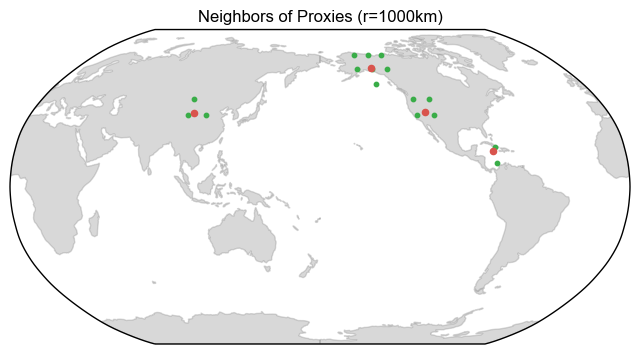

In [125]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches


fig = plt.figure(figsize=[8, 8])
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=180))
ax.set_title(f'Neighbors of Proxies (r={distance}km)')
transform=ccrs.PlateCarree()

ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)



# for i in range(job.temp.shape[1], job.temp.shape[1]+job.proxy.shape[1]):
# for i in range(job.temp.shape[1], job.temp.shape[1]+3):
idx_base = job.temp.shape[1]
for i in [idx_base+10, idx_base+40, idx_base+80, idx_base+120]:
    target_lon, target_lat = job.lonlat[i]
    print(f'target #{i+1-job.temp.shape[1]:03d}:', job.lonlat[i])
    
    neighbor_lons = []
    neighbor_lats = []
    for j, m in enumerate(adj[i, :]):
        if m == 1:
            if list(job.lonlat[j]) != [target_lon, target_lat]:
                print('neighbor:', job.lonlat[j])
                neighbor_lons.append(job.lonlat[j, 0])
                neighbor_lats.append(job.lonlat[j, 1])
            
    ax.scatter(neighbor_lons, neighbor_lats, marker='o', s=10, color=sns.xkcd_rgb['medium green'], transform=transform)
    ax.scatter(target_lon, target_lat, marker='o', s=20, color=sns.xkcd_rgb['pale red'], transform=transform)
    


LMRt.showfig(fig)
LMRt.closefig()

In [117]:
distance = 2000

D = dMat(job.lonlat)
adj = (D <= distance).astype(np.int)           # replace 0s or 1s
adj[np.ix_(ind_P, ind_P)] = np.eye(len(ind_P)) # set pp to 1s

<ipython-input-117-ed4640b9d62d>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adj = (D <= distance).astype(np.int)           # replace 0s or 1s


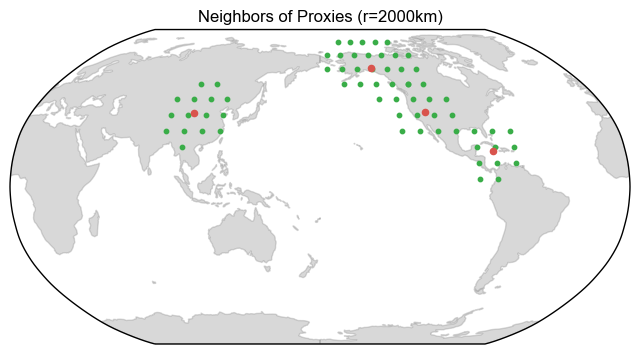

In [119]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches


fig = plt.figure(figsize=[8, 8])
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=180))
ax.set_title(f'Neighbors of Proxies (r={distance}km)')
transform=ccrs.PlateCarree()

ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)



# for i in range(job.temp.shape[1], job.temp.shape[1]+job.proxy.shape[1]):
# for i in range(job.temp.shape[1], job.temp.shape[1]+3):
idx_base = job.temp.shape[1]
for i in [idx_base+10, idx_base+40, idx_base+80, idx_base+120]:
    target_lon, target_lat = job.lonlat[i]
#     print(f'target #{i+1-job.temp.shape[1]:03d}:', job.lonlat[i])
    
    neighbor_lons = []
    neighbor_lats = []
    for j, m in enumerate(adj[i, :]):
        if m == 1:
            if list(job.lonlat[j]) != [target_lon, target_lat]:
#                 print('neighbor:', job.lonlat[j])
                neighbor_lons.append(job.lonlat[j, 0])
                neighbor_lats.append(job.lonlat[j, 1])
            
    ax.scatter(neighbor_lons, neighbor_lats, marker='o', s=10, color=sns.xkcd_rgb['medium green'], transform=transform)
    ax.scatter(target_lon, target_lat, marker='o', s=20, color=sns.xkcd_rgb['pale red'], transform=transform)
    


LMRt.showfig(fig)
LMRt.closefig()

In [126]:
distance = 5000

D = dMat(job.lonlat)
adj = (D <= distance).astype(np.int)           # replace 0s or 1s
adj[np.ix_(ind_P, ind_P)] = np.eye(len(ind_P)) # set pp to 1s

<ipython-input-126-1021fa89d54c>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adj = (D <= distance).astype(np.int)           # replace 0s or 1s


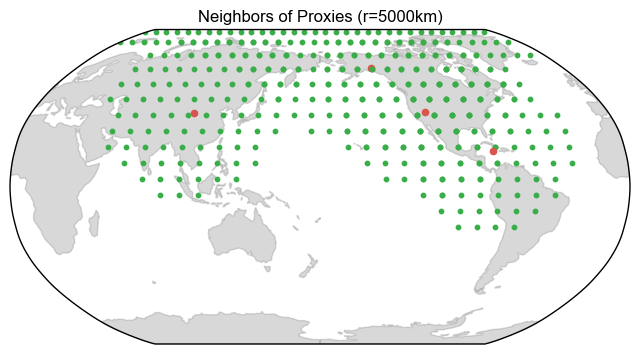

In [127]:
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches


fig = plt.figure(figsize=[8, 8])
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=180))
ax.set_title(f'Neighbors of Proxies (r={distance}km)')
transform=ccrs.PlateCarree()

ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='gray', alpha=0.3)



# for i in range(job.temp.shape[1], job.temp.shape[1]+job.proxy.shape[1]):
# for i in range(job.temp.shape[1], job.temp.shape[1]+3):
idx_base = job.temp.shape[1]
for i in [idx_base+10, idx_base+40, idx_base+80, idx_base+120]:
    target_lon, target_lat = job.lonlat[i]
#     print(f'target #{i+1-job.temp.shape[1]:03d}:', job.lonlat[i])
    
    neighbor_lons = []
    neighbor_lats = []
    for j, m in enumerate(adj[i, :]):
        if m == 1:
            if list(job.lonlat[j]) != [target_lon, target_lat]:
#                 print('neighbor:', job.lonlat[j])
                neighbor_lons.append(job.lonlat[j, 0])
                neighbor_lats.append(job.lonlat[j, 1])
            
    ax.scatter(neighbor_lons, neighbor_lats, marker='o', s=10, color=sns.xkcd_rgb['medium green'], transform=transform)
    ax.scatter(target_lon, target_lat, marker='o', s=20, color=sns.xkcd_rgb['pale red'], transform=transform)
    


LMRt.showfig(fig)
LMRt.closefig()